In [3]:
# imports
from matplotlib import rc
from matplotlib import pyplot as plt
import matplotlib
from Generate_dCS_Strain import *
import numpy as np
rc('text', usetex=True)

# Plot parameters
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['axes.labelsize'] = 24
matplotlib.rcParams['xtick.labelsize'] = 30
matplotlib.rcParams['ytick.labelsize'] = 30
matplotlib.rcParams['xtick.major.size'] = 20
matplotlib.rcParams['ytick.major.size'] = 20
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['xtick.minor.size'] = 10
matplotlib.rcParams['ytick.minor.size'] = 10
matplotlib.rcParams['legend.fontsize'] = 18
matplotlib.rcParams['legend.frameon'] = True
matplotlib.rcParams['lines.linewidth'] = 3


## Helper functions

In [4]:
def CutTimes(time, data, TLow, TUp): 
    """ Cut time and data to be between 
        TLow and TUp  """
    TLowIndex = np.where(time >= TLow)[0][0]
    TUpIndex = np.where(time <= TUp)[0][-1]
    time = time[TLowIndex:TUpIndex]
    data = data[TLowIndex:TUpIndex]
    return time, data

def GetPeakTimeMode(time, data): 
    """ Grab the peak time of some data """
    t_peak = time[np.argmax(np.absolute(data))]
    return t_peak

def SubtractPeakTimeMode(time, data): 
    """ Subtract the peak time of some data """
    t_peak = GetPeakTimeMode(time, data)
    return time - t_peak

## Plot SXS waveforms 

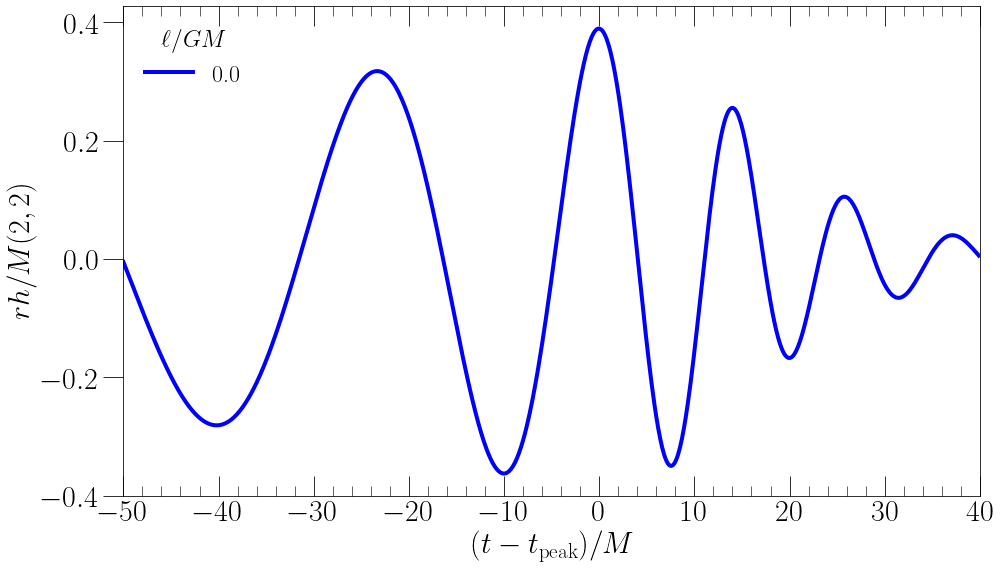

In [5]:

def PlotStrainElls(ells):
    """ Plot the strains generated with Generate_dCS_Strain.py
        ells is an array of values of the coupling constant 
        (note that these waveforms need to already exist )"""
    
    f, ax = plt.subplots(1, figsize=(14,8))
    mode = (2,2)
    start = -50
    stop = 40
    p = "Waveforms/"

    ## Color, linewidth, and linestyle values -- please modify as needed 
    colors = ['blue', 'lightblue', 'red', 'black']
    lss = ['-','--','-', '--']
    lws = [4.0, 4.0, 2.0, 2.0]
    
    for ell, c, ls, lw in zip(ells, colors, lss, lws):
        time, strain = ReadExtrapolatedMode(p, "dCSModified", mode, ell=ell)
        time = SubtractPeakTimeMode(time, strain)
        time, strain = CutTimes(time, strain, start, stop)
        ax.plot(time, np.real(strain), label=ell, lw=lw, color=c, ls=ls)

    legend = ax.legend(fontsize=24, loc='upper left', frameon=False, ncol=1, title='$\ell/GM$')
    plt.setp(legend.get_title(),fontsize=24)
    ax.set_ylabel('$rh/M (2,2)$', fontsize=30)

    ax.set_xlabel('$(t - t_\mathrm{peak})/M$', fontsize=30) 
    ax.set_xlim(start, stop)
    plt.tight_layout()
    #plt.savefig('SXS_format.pdf')
    plt.show()     

PlotStrainElls([0.0])